In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import time 
%matplotlib inline

In [6]:
df = pd.read_excel(r'C:/Users/Acer/Desktop/Research/Market indices Daily2010.xlsx',index_col=0)

In [7]:
df.head()

,ASPI,Banks_finance_insurance,Berverage_Food_tobacco,Chemicals_Pharmaceuticals,Construction_Engineering,Diversified,Footwear_Textile,Healthcare,Hotels_Travels,Investment_Trusts,...,Land_Property,Manufacturing,Motors,Oil_Palms,Plantations,Power_Energy,Services,Stores_Supplies,Telecommunications,Trading
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3481.64,6721.11,5588.24,5382.99,3688.07,1187.82,629.29,414.28,2962.85,37690.00,...,349.63,2052.62,7361.37,43675.36,641.70,83.86,11123.45,11649.28,154.57,3904.25
2010-01-05,3519.94,6810.09,5757.35,5392.97,3793.02,1196.31,629.25,417.28,3077.31,37440.71,...,350.34,2066.57,7386.19,43811.55,647.39,82.82,12266.18,11649.28,152.55,3845.27
2010-01-06,3509.36,6817.22,5790.17,5361.84,3746.95,1182.62,643.32,419.47,3160.33,36495.17,...,359.17,2053.84,7394.96,40976.88,639.34,82.87,12329.78,11649.28,151.04,3914.50
2010-01-07,3478.56,6796.83,5748.51,5279.52,3680.07,1178.24,643.32,418.08,3100.39,35791.33,...,361.43,2046.68,7409.26,40008.43,633.58,83.14,12092.33,11125.50,148.26,3879.55
2010-01-08,3514.63,6833.84,5775.33,5273.74,3639.49,1187.07,652.82,414.38,3123.74,35677.12,...,367.82,2059.70,7627.09,42395.27,660.36,82.98,12092.33,11141.21,150.54,4102.46


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1743 entries, 2010-01-04 to 2017-03-31
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ASPI                       1743 non-null   float64
 1   Banks_finance_insurance    1743 non-null   float64
 2   Berverage_Food_tobacco     1743 non-null   float64
 3   Chemicals_Pharmaceuticals  1743 non-null   float64
 4   Construction_Engineering   1743 non-null   float64
 5   Diversified                1743 non-null   float64
 6   Footwear_Textile           1743 non-null   float64
 7   Healthcare                 1743 non-null   float64
 8   Hotels_Travels             1743 non-null   float64
 9   Investment_Trusts          1743 non-null   float64
 10  IT                         1743 non-null   float64
 11  Land_Property              1743 non-null   float64
 12  Manufacturing              1743 non-null   float64
 13  Motors                     174

In [9]:
x= df.values

In [10]:

covar_matrix = PCA(n_components = 21)

In [11]:
def generate_PCA_features_plot_after_clustering (x, cluster_name):
    # For the 20 features
    covar_matrix = PCA(n_components = 21)
    covar_matrix.fit(x)
    variance = covar_matrix.explained_variance_ratio_

    #calculate variance ratios
    var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
    print ("VARIANCE: " + str(var))
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(0, 21, 1))
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Principal Components')
    plt.title('PCA Analysis for ')
    plt.ylim(30,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)
    plt.grid()
    plt.show()
    
    my_header = ['Banks_finance_insurance','Berverage_Food_tobacco','Chemicals_Pharmaceuticals','Construction_Engineering','Diversified','Footwear_Textile','Healthcare','Hotels_Travels','Investment_Trusts','IT','Land_Property','Manufacturing','Motors','Oil_Palms','Plantations','Power_Energy','Services','Stores_Supplies','Telecommunications','Trading']
    
    OPTIMUM_NUM_OF_FEATURES = 16

    # Let's see first what amount of variance does each PC explain.

    # To sum up, look at the absolute values of the Eigenvectors'
    # components corresponding to the k largest Eigenvalues. In sklearn
    # the components are sorted by explained_variance_. The larger they are these absolute values, the more a specific feature contributes to that principal component

    print ("\nmost important features; most to least.......\n")

    print ("\nEigen values....\n")
    print (covar_matrix.explained_variance_)

    print ("\n")
    print(covar_matrix.singular_values_)  

    # Empirical mean
    print (covar_matrix.mean_)

    '''
    # conturibution the original fetures towards to new PCs 
    print (pd.DataFrame(covar_matrix.components_, columns=x.columns, index = ['PC-1','PC-2', 'PC-3', 'PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20']))
    '''
    
    list_of_list_features = []

    contribution_Banks_finance_insurance = 0
    contribution_Berverage_Food_tobacco = 0
    contribution_Chemicals_Pharmaceuticals = 0
    contribution_Construction_Engineering = 0
    contribution_Diversified = 0
    contribution_Footwear_Textile = 0
    contribution_Healthcare = 0
    contribution_Hotels_Travels = 0
    contribution_Investment_Trusts = 0
    contribution_IT = 0
    contribution_Land_Property = 0
    contribution_Manufacturing = 0
    contribution_Motors = 0
    contribution_Oil_Palms = 0
    contribution_Plantations = 0
    contribution_Power_Energy = 0
    contribution_Services = 0
    contribution_Stores_Supplies = 0
    contribution_Telecommunications = 0
    contribution_Trading = 0
    
    print ("\n")
    for i, component in enumerate(covar_matrix.components_):
        print("{} component: {}% of initial variance".format(i + 1, round(100 * covar_matrix.explained_variance_ratio_[i], 2)))
        # print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, my_header)))

        for value, name in zip(component, my_header):
            print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, my_header)))
            if name == "Banks_finance_insurance":
                contribution_Banks_finance_insurance += abs(value)
            elif name == "Berverage_Food_tobacco":
                contribution_Berverage_Food_tobacco += abs(value)
            elif name == "Chemicals_Pharmaceuticals":
                contribution_Chemicals_Pharmaceuticals += abs(value)
            elif name == "Construction_Engineering":
                contribution_Construction_Engineering += abs(value)
            elif name == "Diversified":
                contribution_Diversified += abs(value)
            elif name == "Footwear_Textile":
                contribution_Footwear_Textile += abs(value)
            elif name == "Healthcare":
                contribution_Healthcare += abs(value)
            elif name == "Hotels_Travels":
                contribution_Hotels_Travels += abs(value)
            elif name == "Investment_Trusts":
                contribution_Investment_Trusts += abs(value) 
            elif name == "IT":
                contribution_IT += abs(value)
            elif name == "Land_Property":
                contribution_Land_Property += abs(value)
            elif name == "Manufacturing":
                contribution_Manufacturing += abs(value)
            elif name == "Motors":
                contribution_Motors += abs(value)
            elif name == "Oil_Palms":
                contribution_Oil_Palms += abs(value)
            elif name == "Plantations":
                contribution_Plantations += abs(value)
            elif name == "Power_Energy":
                contribution_Power_Energy += abs(value)
            elif name == "Services":
                contribution_Services += abs(value)
            elif name == "Stores_Supplies":
                contribution_Stores_Supplies += abs(value)
            elif name == "Telecommunications":
                contribution_Telecommunications += abs(value)
            elif name == "Trading":
                contribution_Trading += abs(value)

    print (list_of_list_features)
    print ("LENGTH:", len(list_of_list_features))

    '''
    for my_list in range (len(list_of_list_features)):
        print (list_of_list_features)
    '''

    list_of_list_features.append(["Banks_finance_insurance", contribution_Banks_finance_insurance])
    list_of_list_features.append(["Berverage_Food_tobacco", contribution_Berverage_Food_tobacco]) 
    list_of_list_features.append(["Chemicals_Pharmaceuticals", contribution_Chemicals_Pharmaceuticals])
    list_of_list_features.append(["Construction_Engineering", contribution_Construction_Engineering])
    list_of_list_features.append(["Diversified", contribution_Diversified])
    list_of_list_features.append(["Footwear_Textile", contribution_Footwear_Textile])
    list_of_list_features.append(["Healthcare", contribution_Healthcare])
    list_of_list_features.append(["Hotels_Travels", contribution_Hotels_Travels])
    list_of_list_features.append(["Investment_Trusts", contribution_Investment_Trusts])
    list_of_list_features.append(["IT", contribution_IT])
    list_of_list_features.append(["Land_Property", contribution_Land_Property])
    list_of_list_features.append(["Manufacturing", contribution_Manufacturing])
    list_of_list_features.append(["Motors", contribution_Motors])
    list_of_list_features.append(["Oil_Palms", contribution_Oil_Palms])
    list_of_list_features.append(["Plantations", contribution_Plantations]) 
    list_of_list_features.append(["Power_Energy", contribution_Power_Energy])
    list_of_list_features.append(["Services", contribution_Services])
    list_of_list_features.append(["Stores_Supplies", contribution_Stores_Supplies])
    list_of_list_features.append(["Telecommunications", contribution_Telecommunications])
    list_of_list_features.append(["Trading", contribution_Trading])

    print ("\n -------------- contribution of features to the cluster -------------- \n")
    print ("Banks_finance_insurance", contribution_Banks_finance_insurance) 
    print ("Berverage_Food_tobacco", contribution_Berverage_Food_tobacco) 
    print ("Chemicals_Pharmaceuticals", contribution_Chemicals_Pharmaceuticals) 
    print ("Construction_Engineering", contribution_Construction_Engineering) 
    print ("Diversified", contribution_Diversified) 
    print ("Footwear_Textile", contribution_Footwear_Textile) 
    print ("Healthcare", contribution_Healthcare) 
    print ("Hotels_Travels", contribution_Hotels_Travels) 
    print ("Investment_Trusts", contribution_Investment_Trusts) 
    print ("IT", contribution_IT) 
    print ("Land_Property", contribution_Land_Property) 
    print ("Manufacturing", contribution_Manufacturing) 
    print ("Motors", contribution_Motors) 
    print ("Oil_Palms", contribution_Oil_Palms) 
    print ("Plantations", contribution_Plantations) 
    print ("Power_Energy", contribution_Power_Energy) 
    print ("Services", contribution_Services) 
    print ("Stores_Supplies", contribution_Stores_Supplies) 
    print ("Telecommunications", contribution_Telecommunications) 
    print ("Trading", contribution_Trading) 

    print (list_of_list_features)
 
    # sort the values and find the first 5 features that contributes teh most to the specific cluster
    sorted_list = sorted(list_of_list_features, key=lambda x: float(x[1]), reverse=True)

    print ("\nSorted features list\n")
    print (sorted_list)
    
    print ("\n------ First five features contributing the most to the cluster: %s ------\n" % cluster_name)
    for item in sorted_list[:5]:
        print (item)
        

    return OPTIMUM_NUM_OF_FEATURES 
    

In [12]:
def generate_PCA_features_plot (x):
    covar_matrix = PCA(n_components = 20)
    #we have 20 features
    covar_matrix.fit(x)
    variance = covar_matrix.explained_variance_ratio_

    #calculate variance ratios
    var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

    print ("\n============================ PCA ========================\n")
  
    my_header = ['Banks_finance_insurance','Berverage_Food_tobacco','Chemicals_Pharmaceuticals','Construction_Engineering','Diversified','Footwear_Textile','Healthcare','Hotels_Travels','Investment_Trusts','IT','Land_Property','Manufacturing','Motors','Oil_Palms','Plantations','Power_Energy','Services','Stores_Supplies','Telecommunications','Trading']
    
    print ("VARIANCE: " + str(var)) # by default it's in acending order - cumulative


    # ------- plot shows that how many features are needed to cover the entire data --------
    # Do we get the magic number by visuvalization or programmatically ???
    # using visualization, the optimum num. of features is 16....

    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(0, 20, 1)) # num. of features in the initial dataset is 20
    #ax.set_yticks(np.arange(0, 20, 1))
    
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Principal components')
    plt.title('PCA Analysis')
    plt.ylim(30,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)
    plt.grid()
    plt.show()

    OPTIMUM_NUM_OF_FEATURES = 16

    # Let's see first what amount of variance does each PC explain.
    #print (covar_matrix.explained_variance_ratio_)

    #print(abs( covar_matrix.components_ ))

    # To sum up, look at the absolute values of the Eigenvectors'
    # components corresponding to the k largest Eigenvalues. In sklearn
    # the components are sorted by explained_variance_. The larger they are these absolute values, the more a specific feature contributes to that principal component

    print ("\nmost important features; most to least.......\n")
    print (covar_matrix.explained_variance_)

    '''
    # conturibution the original fetures towards to new PCs 
    print (pd.DataFrame(covar_matrix.components_, columns=x.columns, index = ['PC-1','PC-2', 'PC-3', 'PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20']))
    '''

    '''
    for i, component in enumerate(covar_matrix.components_):
        print("{} component: {}% of initial variance".format(i + 1, round(100 * covar_matrix.explained_variance_ratio_[i], 2)))
        print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, my_header)))
        print ("\n")
    '''

    return OPTIMUM_NUM_OF_FEATURES


============================ PCA ========================

VARIANCE: [ 73.6  93.4  97.6  98.6  99.5  99.8  99.9 100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100.  100.  100. ]


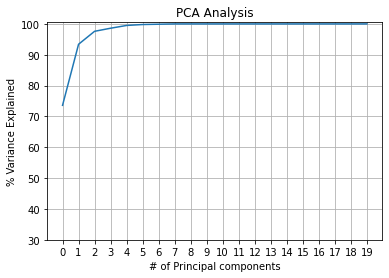


most important features; most to least.......

[7.72918952e+08 2.07984707e+08 4.37110364e+07 1.08952527e+07
 9.59532055e+06 3.06757197e+06 1.07043917e+06 7.80480845e+05
 1.77428495e+05 6.21901270e+04 4.79619294e+04 2.06227447e+04
 5.03592806e+03 3.24233311e+03 2.38091837e+03 1.75406897e+03
 6.40607621e+02 3.09517438e+02 1.55900317e+02 3.72490112e+01]


16

In [13]:
 generate_PCA_features_plot (x)

In [14]:
# Run a elbow method for identifiy k

In [14]:
def elbow_plot (X):
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    Sum_of_squared_distances = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters)
        kmeans.fit(X)
        print ("For n_clusters =", n_clusters, "The inertia is :", kmeans.inertia_)
        Sum_of_squared_distances.append(kmeans.inertia_)
        # print(inertia_list)
    plt.plot(range_n_clusters, Sum_of_squared_distances, "-o")
    plt.xlabel('k')
    plt.ylabel('Average distortion/ Sum_of_squared_distances')
    plt.ylim([8500,12000])
    plt.title('Selecting k with the Elbow Method')
    plt.show()
    
    

For n_clusters = 2 The inertia is : 1021510756597.5093
For n_clusters = 3 The inertia is : 548589166761.93646
For n_clusters = 4 The inertia is : 420218361669.13226
For n_clusters = 5 The inertia is : 302318364234.7161
For n_clusters = 6 The inertia is : 216410926537.26498
For n_clusters = 7 The inertia is : 147287661812.08527
For n_clusters = 8 The inertia is : 132240975479.76611
For n_clusters = 9 The inertia is : 117612867518.89731
For n_clusters = 10 The inertia is : 106591396897.83931
For n_clusters = 11 The inertia is : 96138959658.5464
For n_clusters = 12 The inertia is : 86864375199.40617
For n_clusters = 13 The inertia is : 80923218631.31218
For n_clusters = 14 The inertia is : 70868524846.03256
For n_clusters = 15 The inertia is : 63460128629.3174
For n_clusters = 16 The inertia is : 62289356342.46049


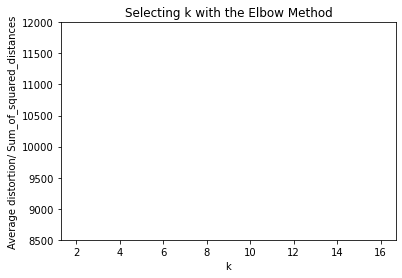

In [15]:
elbow_plot (x)

In [16]:
# using this large inertia is comes under 3 clusters

In [17]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Banks_finance_insurance','Berverage_Food_tobacco','Chemicals_Pharmaceuticals','Construction_Engineering','Diversified','Footwear_Textile','Healthcare','Hotels_Travels','Investment_Trusts','IT','Land_Property','Manufacturing','Motors','Oil_Palms','Plantations','Power_Energy','Services','Stores_Supplies','Telecommunications','Trading']])
    sse.append(km.inertia_)

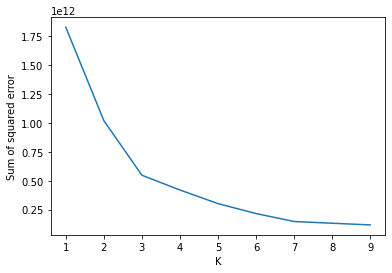

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [19]:
# as a result of elbow method k is 3

In [20]:
def final_clustering (X, num_of_clusters):
    # https://towardsdatascience.com/predictive-customer-analytics-part-iv-ab15843c8c63
    final_model = KMeans(num_of_clusters)
    final_model.fit(X)
    prediction = final_model.predict(X)
    
    #print (prediction)
    #print (type (prediction))
    #print ("Prediction Length: %d" % len(prediction))

    #print ("--- Shape --- %s " % str(X.shape))

    # length = len(X['monthly_bill'])
    # print ("Column len: %d" % length)

    #Join predicted clusters back to raw data
    # TODO copy is not the propoer way...use X.loc.....
    # Create a columns with the corresponding cluster number
    X = X.copy()
    df["GROUP"] =  prediction
    
    stock = []
    #print ("--- Shape now --- %s " % str(X.shape))

    num_of_rows, num_of_cols = df.shape
    
    for i in range(num_of_rows):
        stock.append(0)

    stock_array = np.asarray(stock) 
    # print (stock_array.shape)

    # print (X.head(10))

    count_cluster_0 = 0
    count_cluster_1 = 0
    count_cluster_2 = 0
    
 
    banks_0 = 0
    banks_1 = 0
    banks_2 = 0
    

    food_0 = 0
    food_1 = 0
    food_2 = 0
   

    textile_0 = 0
    textile_1 = 0
    textile_2 = 0
   


    chemicals_0 = 0
    chemicals_1 = 0
    chemicals_2 = 0
    

    Investment_0 = 0
    Investment_1 = 0
    Investment_2 = 0
    


    # indices of a specific cluster position
    index_cluster_0 = []
    index_cluster_1 = []
    index_cluster_2 = []
    
    #for index, row in X.head(10).iterrows():
    for index, row in df.iterrows():
        #print ("ROWS", index, int (row["GROUP"]), row["monthly_bill"], row["billing_complaint_count"], row["download_bandwidth"])
        
        # do this by cluster by cluster
        if int(row["GROUP"]) == 0:
            count_cluster_0 += 1
            banks_0 += float (row["Banks_finance_insurance"])
            food_0 += float (row["Berverage_Food_tobacco"])
            textile_0 += float (row["Footwear_Textile"])
            chemicals_0 +=float(row["Chemicals_Pharmaceuticals"])
            Investment_0 +=float(row['Investment_Trusts'])
            index_cluster_0.append(index)
            
        elif int(row["GROUP"]) == 1:
            count_cluster_1 += 1
            banks_1 += float (row["Banks_finance_insurance"])
            food_1 += float (row["Berverage_Food_tobacco"])
            textile_1 += float (row["Footwear_Textile"])
            chemicals_1 +=float(row["Chemicals_Pharmaceuticals"])
            Investment_1 +=float(row['Investment_Trusts'])
            index_cluster_1.append(index)
            
        elif int(row["GROUP"]) == 2:
            count_cluster_2 += 1
            banks_2 += float (row["Banks_finance_insurance"])
            food_2 += float (row["Berverage_Food_tobacco"])
            textile_2 += float (row["Footwear_Textile"])
            chemicals_2 +=float(row["Chemicals_Pharmaceuticals"])
            Investment_2 +=float(row['Investment_Trusts'])
            index_cluster_2.append(index)
            
    print (count_cluster_0, count_cluster_1, count_cluster_2)
        
    mean_banks_cluster_0 = banks_0 / count_cluster_0
    mean_banks_cluster_1 = banks_1 / count_cluster_1
    mean_banks_cluster_2 = banks_2 / count_cluster_2
    

    mean_food_cluster_0 = food_0 / count_cluster_0
    mean_food_cluster_1 = food_1 / count_cluster_1
    mean_food_cluster_2 = food_2 / count_cluster_2
    

    mean_textile_cluster_0 = textile_0 / count_cluster_0
    mean_textile_cluster_1 = textile_1 / count_cluster_1
    mean_textile_cluster_2 = textile_2 / count_cluster_2
    
    mean_chemicals_cluster_0 = chemicals_0/count_cluster_0
    mean_chemicals_cluster_1 = chemicals_1 / count_cluster_1
    mean_chemicals_cluster_2 = chemicals_2 / count_cluster_2
    
     # Mean of the column before clustering
    mean_banks_no_clustering = df["Banks_finance_insurance"].mean()
    mean_food_no_clustering = df["Berverage_Food_tobacco"].mean()
    mean_textile_no_clustering = df["Footwear_Textile"].mean()
    mean_chemicals_no_clustering = df["Chemicals_Pharmaceuticals"].mean()
    
    print ("\n")
    print ("Unclustered mean for banks", mean_banks_no_clustering)
    print ("Unclustered mean for food", mean_food_no_clustering)
    print ("Unclustered mean for textile", mean_textile_no_clustering)
    print("Unclustered mean for chemicals", mean_chemicals_no_clustering)
    
    # drop all the rows except rows belong to one cluster...
    cluster_0_df = df[df.GROUP == 0]
    cluster_1_df = df[df.GROUP == 1]
    cluster_2_df = df[df.GROUP == 2]
    
    # now using above method we create and check cluster by cluster
    
    print ("\n ========================= PCA info for cluster_0 ========================= \n")
    generate_PCA_features_plot_after_clustering (cluster_0_df, "cluster-0")
    
    print ("\n ========================= PCA info for cluster_1 ========================= \n")
    generate_PCA_features_plot_after_clustering (cluster_1_df, "cluster-1")
    print ("\n ========================= PCA info for cluster_2 ========================= \n")
    generate_PCA_features_plot_after_clustering (cluster_2_df, "cluster-2")
    
   

1044 449 250


Unclustered mean for banks 14596.87214572576
Unclustered mean for food 16817.780441767067
Unclustered mean for textile 971.3371485943775
Unclustered mean for chemicals 7996.26230636833

 ========================= PCA info for cluster_0 ========================= 

VARIANCE: [46.8 87.  96.4 97.9 98.8 99.5 99.8 99.9 99.9 99.9 99.9 99.9 99.9 99.9
 99.9 99.9 99.9 99.9 99.9 99.9 99.9]


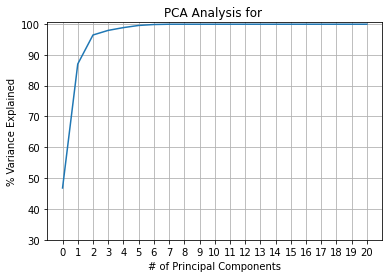


most important features; most to least.......


Eigen values....

[1.02108873e+08 8.75947240e+07 2.03969257e+07 3.26748326e+06
 1.87084852e+06 1.55826203e+06 6.87374149e+05 2.92938368e+05
 9.26211111e+04 5.39626787e+04 2.00302490e+04 1.43030646e+04
 3.68302048e+03 1.75948623e+03 1.24933842e+03 4.77868475e+02
 2.49321995e+02 1.38926412e+02 8.98414626e+01 3.07829021e+01
 5.65016240e+00]


[3.26342694e+05 3.02260313e+05 1.45856071e+05 5.83779499e+04
 4.41734650e+04 4.03146040e+04 2.67755716e+04 1.74795514e+04
 9.82872418e+03 7.50220460e+03 4.57072748e+03 3.86239516e+03
 1.95994652e+03 1.35467492e+03 1.14151652e+03 7.05986416e+02
 5.09943959e+02 3.80657652e+02 3.06112145e+02 1.79183054e+02
 7.67666554e+01]
[6.29052568e+03 1.48006126e+04 1.80121039e+04 7.51369495e+03
 3.06581129e+03 1.90595685e+03 9.25184397e+02 7.04348238e+02
 3.53946188e+03 2.05440138e+04 9.46888123e+01 5.98107883e+02
 3.32946759e+03 1.75379888e+04 1.04337929e+05 8.10214215e+02
 1.35265642e+02 2.39830766e+04 2.50386757e+

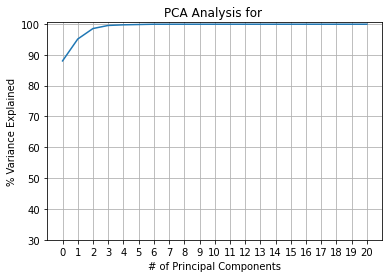


most important features; most to least.......


Eigen values....

[3.12887010e+08 2.51970839e+07 1.19794978e+07 3.71351328e+06
 7.85640894e+05 4.80523558e+05 4.10772573e+05 1.49295304e+05
 4.20869007e+04 1.76067148e+04 6.56437255e+03 5.52630950e+03
 1.70892605e+03 1.32086321e+03 7.18632292e+02 5.28828230e+02
 2.25911221e+02 9.59728713e+01 4.72152981e+01 8.71099382e+00
 3.37156310e+00]


[3.74397356e+05 1.06246382e+05 7.32585490e+04 4.07879143e+04
 1.87607868e+04 1.46722375e+04 1.35656225e+04 8.17828198e+03
 4.34222656e+03 2.80852421e+03 1.71488743e+03 1.57346327e+03
 8.74985068e+02 7.69250751e+02 5.67403971e+02 4.86739198e+02
 3.18132405e+02 2.07354398e+02 1.45438831e+02 6.24701947e+01
 3.88646403e+01]
[5.61433178e+03 1.33021355e+04 1.68214567e+04 6.73261379e+03
 3.00481893e+03 1.53068439e+03 9.13921203e+02 8.16351180e+02
 3.31431158e+03 1.92310586e+04 7.27267929e+01 5.75854878e+02
 3.64002024e+03 1.45334518e+04 6.60505014e+04 7.27243697e+02
 1.33785078e+02 1.84431783e+04 2.44708494e+

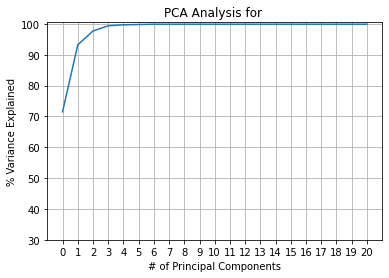


most important features; most to least.......


Eigen values....

[4.65201091e+08 1.41077286e+08 2.95675947e+07 1.11659974e+07
 1.68733186e+06 7.77515172e+05 5.04787114e+05 1.58131709e+05
 6.06953475e+04 1.19244740e+04 5.59587170e+03 2.93036325e+03
 1.27101742e+03 1.05937682e+03 8.78806694e+02 5.52249307e+02
 2.35234642e+02 1.88575169e+02 5.15578226e+01 6.89286937e+00
 1.63827078e-01]


[3.40345518e+05 1.87425303e+05 8.58040271e+04 5.27288663e+04
 2.04974543e+04 1.39140676e+04 1.12112440e+04 6.27493391e+03
 3.88756242e+03 1.72313494e+03 1.18041181e+03 8.54201645e+02
 5.62568518e+02 5.13599872e+02 4.67785065e+02 3.70823513e+02
 2.42019474e+02 2.16691525e+02 1.13304448e+02 4.14285466e+01
 6.38693529e+00]
[6.83533356e+03 1.60713990e+04 1.18236833e+04 1.22809763e+04
 3.86452400e+03 2.23838924e+03 1.26719008e+03 5.81442240e+02
 4.54461300e+03 4.18058351e+04 2.66329200e+02 6.07174000e+02
 3.74811672e+03 3.03070180e+04 1.33398211e+05 1.27403400e+03
 1.47345640e+02 2.83794398e+04 6.01615540e+

In [21]:
final_clustering (x, 3)

In [22]:
def my_k_means(X, num_of_clusters):

   
    kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=num_of_clusters, n_init=10, n_jobs=1, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0)

    t0 = time.time()
    kmeans.fit(X)
    t_batch = time.time() - t0


    print ("\n---- KMeans ----\n")
    # Basically these are assigned cluster numbers
    print(kmeans.labels_)
    # means distance of each feature ??/
    print(kmeans.cluster_centers_)

    # accessing params
    k_means_labels = kmeans.labels_
    k_means_cluster_centers = kmeans.cluster_centers_


    # Plot result
    fig = pl.figure(figsize=(20, 7))
    fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']

    ax = fig.add_subplot(1, 3, 1)
    for k, col in zip(range(num_of_clusters), colors):
        my_members = k_means_labels == k
        cluster_center = k_means_cluster_centers[k]
        ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                                    markeredgecolor='k', markersize=6)
    ax.set_title('KMeans')
    ax.set_xticks(())
    ax.set_yticks(())
    pl.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (t_batch, kmeans.inertia_))
    pl.show()

    print ("\n---- KMeans End ----\n")



---- KMeans ----

[2 2 2 ... 2 2 2]
[[6.29052568e+03 1.48006126e+04 1.80121039e+04 7.51369495e+03
  3.06581129e+03 1.90595685e+03 9.25184397e+02 7.04348238e+02
  3.53946188e+03 2.05440138e+04 9.46888123e+01 5.98107883e+02
  3.32946759e+03 1.75379888e+04 1.04337929e+05 8.10214215e+02
  1.35265642e+02 2.39830766e+04 2.50386757e+04 1.79089013e+02
  1.67714012e+04]
 [6.83533356e+03 1.60713990e+04 1.18236833e+04 1.22809763e+04
  3.86452400e+03 2.23838924e+03 1.26719008e+03 5.81442240e+02
  4.54461300e+03 4.18058351e+04 2.66329200e+02 6.07174000e+02
  3.74811672e+03 3.03070180e+04 1.33398211e+05 1.27403400e+03
  1.47345640e+02 2.83794398e+04 6.01615540e+04 1.90563440e+02
  2.60163553e+04]
 [5.61433178e+03 1.33021355e+04 1.68214567e+04 6.73261379e+03
  3.00481893e+03 1.53068439e+03 9.13921203e+02 8.16351180e+02
  3.31431158e+03 1.92310586e+04 7.27267929e+01 5.75854878e+02
  3.64002024e+03 1.45334518e+04 6.60505014e+04 7.27243697e+02
  1.33785078e+02 1.84431783e+04 2.44708494e+04 1.65973608e+

C:\Users\Acer\.conda\envs\tenserflow\lib\site-packages\sklearn\cluster\_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
C:\Users\Acer\.conda\envs\tenserflow\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


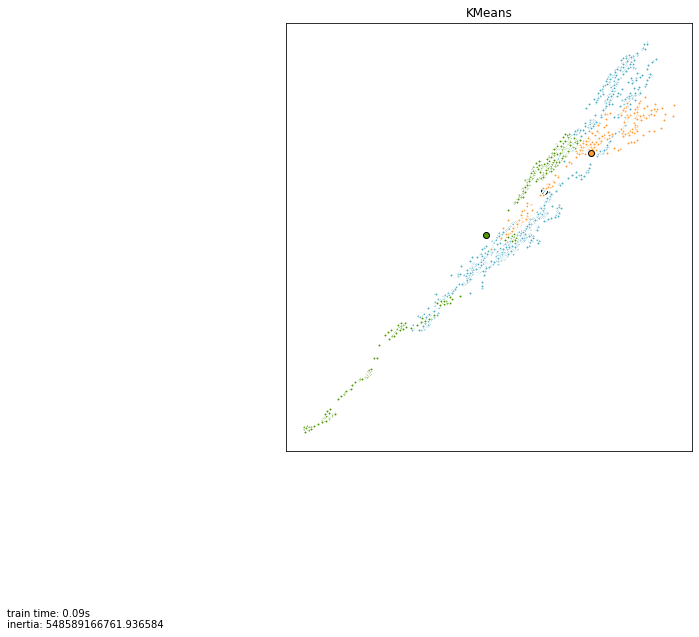


---- KMeans End ----



In [23]:
my_k_means(x,3)
 